<a href="https://colab.research.google.com/github/skmahankali/traffic_collision/blob/main/Traffic_Collisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

# ****TRAFFIC COLLISION ANALYSIS****

> Indented block



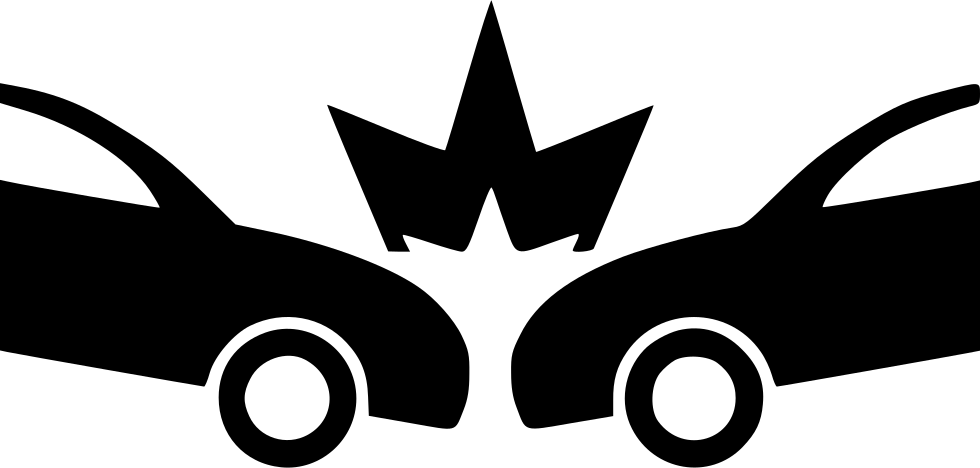

**Team**


---
1) Pavani Goli - pgoli001@odu.edu

https://pavanigoli.github.io/

2) Sai Krishna Mahankali - smaha005@odu.edu

http://skmahankali.github.io/






**Abstract**
 

---
Road Accidents are a common in a big and busy city like Los Angeles. In 2019, there were nearly 54,000 traffic collisions in Los Angeles, which is almost 150 crashes a day. Every year, approximately 25,000 people die due to traffic accidents which means that on an average, for every fourty hours, one person is killed due to traffic accidents. Therefore, analysis on traffic collision data is very useful as it gives us a detailed insight on the occurence of accidents. In this project, we are going to work on dataset consisting of traffic collisions that occured in Los Angeles from 2010 to present. We are going to list out the places in Los Angeles where most accidents took place. We are also going to determine which age group had the highest number of fatalities. From deriving the above results, we could prepare a safer environment for the busy traffic in Los Angeles. We could take extra measures and precautions in areas with highest number of accidents. 



**Goal**


---
The primary goal of the project is to analyse which cities in Los Angeles had highest number of accidents. We can also analyse which age group had the highest number of fatalities in the state of Los Angeles.




**Primary Dataset**


---
URL: https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

Dataset is a primary source of our project. We have acquired the below dataset from the Los Angeles Government website. This dataset consists of traffic accidents that occured from 2010 to the present day. This is a flexible dataset which consists of the date, time and place of the accident. It also gives us the details of the victim's age and gender. The dataset has a total count of 571661 incidents.  




In [ ]:
from google.colab import drive
drive.mount('sample_data/drive/')

Drive already mounted at sample_data/drive/; to attempt to forcibly remount, call drive.mount("sample_data/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import warnings
import seaborn as sns

tc = pd.read_csv("sample_data/drive/MyDrive/trafficcollision.csv")
tc.head(5)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


**Project Plan**




---
Individual Contribution

Sai Krishna: Data Analysis, Cleaning and Modeling

Pavani: Data Visualization and Data Normalization.


Progress Check - I



---


We have been analysing the data for a while. We had decided to drop few useless columns which would be of no use for the end goals. We are also dropping all the null values in the data. 


**DATA ANALYSIS**

Below, we are displaying the dataset that we are using, which will go through several filters so that we finally obtain a clean dataset.

In [ ]:
display (tc)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571656,221206314,02/12/2022,02/09/2022,1730,12,77th Street,1257,997,TRAFFIC COLLISION,3004 3028 3030 4011,46.0,M,H,101.0,STREET,77TH ST,FIGUEROA ST,"(33.9698, -118.2827)"
571657,221206484,02/16/2022,02/16/2022,1207,12,77th Street,1248,997,TRAFFIC COLLISION,3011 3028 4025 3030 3101 3037,99.0,M,W,101.0,STREET,HOOVER ST,GAGE AV,"(33.9822, -118.2871)"
571658,221206585,02/17/2022,02/16/2022,1830,12,77th Street,1257,997,TRAFFIC COLLISION,3036 3004 3024 3101,45.0,M,O,101.0,STREET,SAN PEDRO,83RD,"(33.9693, -118.285)"
571659,221905686,02/13/2022,02/13/2022,1450,19,Mission,1924,997,TRAFFIC COLLISION,3103 3037 3011 3025 4026 3034,99.0,M,H,101.0,STREET,LAUREL CANYON BL,CAREY RANCH LN,"(34.2889, -118.4637)"


**Exploring the data**


---




As we have the dataset now, we are going to explore the dataset and see what are the columns that exist. We can obtain an idea on what columns we would be requiring for our analysis. Therefore, we could remove the columns that are unnecessary. 




In [ ]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571661 entries, 0 to 571660
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR Number               571661 non-null  int64  
 1   Date Reported           571661 non-null  object 
 2   Date Occurred           571661 non-null  object 
 3   Time Occurred           571661 non-null  int64  
 4   Area ID                 571661 non-null  int64  
 5   Area Name               571661 non-null  object 
 6   Reporting District      571661 non-null  int64  
 7   Crime Code              571661 non-null  int64  
 8   Crime Code Description  571661 non-null  object 
 9   MO Codes                484674 non-null  object 
 10  Victim Age              488253 non-null  float64
 11  Victim Sex              562481 non-null  object 
 12  Victim Descent          561585 non-null  object 
 13  Premise Code            570699 non-null  float64
 14  Premise Description 

**Data Cleaning**


---

As we explore the data, we could see all the columns that are present in the dataset. There are a number of columns with information that are of no use in the analysis. We need to remove those columns and include only those columns which help us in analysing the required data. 




In [ ]:
drop_columns_tc = tc.drop(columns=[
    "DR Number", #Division of Records number
    "Date Reported", #We can use the date occured column instead of date reported column
    "Area ID", #We could use the Area name 
    "Crime Code", #Crime code 997 is unique for all columns 
    "Crime Code Description", # Crime code description (Traffic collision) is unique for all columns 
    "MO Codes", # It consists of many null values
    "Premise Code", # We could use premise description column
    "Cross Street"]) # We could use the complete address column

drop_columns_tc.head()

,Date Occurred,Time Occurred,Area Name,Reporting District,Victim Age,Victim Sex,Victim Descent,Premise Description,Address,Location
0,08/24/2019,450,Southwest,356,22.0,M,H,STREET,JEFFERSON BL,"(34.0255, -118.3002)"
1,08/30/2019,2320,Southwest,355,30.0,F,H,STREET,JEFFERSON BL,"(34.0256, -118.3089)"
2,08/25/2019,545,Hollenbeck,422,NaN,M,X,STREET,N BROADWAY,"(34.0738, -118.2078)"
3,11/20/2019,350,Central,128,21.0,M,H,STREET,1ST,"(34.0492, -118.2391)"
4,08/30/2019,2100,Southwest,374,49.0,M,B,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)"


Recognizing the null values



---


In the dataset, there are many unknown values that do not have any value or information. Therefore, we would try to identify such values. 


In [ ]:
tc.isnull()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
571657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
571658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
571659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Below shown are the total number of null values we have in each column. 

In [ ]:
tc.isnull().sum()

DR Number                     0
Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        0
MO Codes                  86987
Victim Age                83408
Victim Sex                 9180
Victim Descent            10076
Premise Code                962
Premise Description         963
Address                       0
Cross Street              27257
Location                      0
dtype: int64

Dropping null values


---
As we have recognised all the null values in the dataset, we are good to drop all the null values now. 


In [ ]:
drop_nulls_tc = drop_columns_tc.dropna()


As we have dropped all the null values in the datset, we are going to check row counts for each column after dropping null values. 

In [ ]:
drop_nulls_tc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483954 entries, 0 to 571660
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date Occurred        483954 non-null  object 
 1   Time Occurred        483954 non-null  int64  
 2   Area Name            483954 non-null  object 
 3   Reporting District   483954 non-null  int64  
 4   Victim Age           483954 non-null  float64
 5   Victim Sex           483954 non-null  object 
 6   Victim Descent       483954 non-null  object 
 7   Premise Description  483954 non-null  object 
 8   Address              483954 non-null  object 
 9   Location             483954 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 40.6+ MB


Renaming Columns


---



We are going to rename all the columns by removing spaces between words. 

In [ ]:
rename_columns_tc = drop_nulls_tc.rename(columns={
    "Date Occurred" : "date",
    "Time Occurred" : "time",
    "Area Name" : "area",
    "Reporting District" : "district",
    "Victim Age" : "victim_age",
    "Victim Sex" : "victim_sex",
    "Victim Descent" : "victim_race",
    "Premise Description" : "premise",
    "Address" : "address",
    "Location" : "location"})

rename_columns_tc.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,08/24/2019,450,Southwest,356,22.0,M,H,STREET,JEFFERSON BL,"(34.0255, -118.3002)"
1,08/30/2019,2320,Southwest,355,30.0,F,H,STREET,JEFFERSON BL,"(34.0256, -118.3089)"
3,11/20/2019,350,Central,128,21.0,M,H,STREET,1ST,"(34.0492, -118.2391)"
4,08/30/2019,2100,Southwest,374,49.0,M,B,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)"
5,07/06/2019,950,Hollenbeck,423,60.0,M,H,STREET,MAIN,"(34.066, -118.2102)"


Mapping Ethicities


---

There are various etnicities living in Los Angeles. We are going to map all the ecinities in our dataset. We are trying to describe all the ethnicities to determine what population of different ethncities were involved in accidents. In the dataset, all the ethnicities are represented with a single letter. We will be expanding the letter into a complete word for better understanding. 

In [ ]:
race_dict = {'H':'Hispanic', 'B':'Black', 'O':'Unknown', 'W':'White', 'X':'Unknown', '-':'Unknown',
             'A':'Asian', 'K':'Asian', 'C':'Asian', 'F':'Asian', 'U':'Pacific Islander',
             'J':'Asian', 'P':'Pacific Islander', 'V':'Asian', 'Z':'Asian',
             'I':'American Indian', 'G':'Pacific Islander', 'S':'Pacific Islander', 'D':'Asian', 'L':'Asian'}

rename_columns_tc["victim_race"] = rename_columns_tc["victim_race"].map(race_dict)

map_ethnicities_tc = rename_columns_tc
map_ethnicities_tc.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,08/24/2019,450,Southwest,356,22.0,M,Hispanic,STREET,JEFFERSON BL,"(34.0255, -118.3002)"
1,08/30/2019,2320,Southwest,355,30.0,F,Hispanic,STREET,JEFFERSON BL,"(34.0256, -118.3089)"
3,11/20/2019,350,Central,128,21.0,M,Hispanic,STREET,1ST,"(34.0492, -118.2391)"
4,08/30/2019,2100,Southwest,374,49.0,M,Black,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)"
5,07/06/2019,950,Hollenbeck,423,60.0,M,Hispanic,STREET,MAIN,"(34.066, -118.2102)"


Mapping Genders


---
We will mapping all the genders in our dataset. We will determine the LA population of both male and female genders. 


In [ ]:
map_gender_tc = map_ethnicities_tc # Set mapped ethnicities equal to a new gender df

gender_dict = {
    'M':'Male', 
    'F':'Female', 
    'X':'Unknown', 
    'H':'Unknown', 
    'N':'Unknown'}

map_gender_tc["victim_sex"] = map_gender_tc["victim_sex"].map(gender_dict)
map_gender_tc.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,08/24/2019,450,Southwest,356,22.0,Male,Hispanic,STREET,JEFFERSON BL,"(34.0255, -118.3002)"
1,08/30/2019,2320,Southwest,355,30.0,Female,Hispanic,STREET,JEFFERSON BL,"(34.0256, -118.3089)"
3,11/20/2019,350,Central,128,21.0,Male,Hispanic,STREET,1ST,"(34.0492, -118.2391)"
4,08/30/2019,2100,Southwest,374,49.0,Male,Black,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)"
5,07/06/2019,950,Hollenbeck,423,60.0,Male,Hispanic,STREET,MAIN,"(34.066, -118.2102)"


Exporting the clean dataset


---
Now, we are going to export the clean dataset into a csv file. 


In [ ]:
map_gender_tc.to_csv("sample_data/drive/MyDrive/clean_trafficcollision.csv",index=False)

Analysis - I



---

For our first part of the analysis, we are going to determine who all were included in the traffic collisions. We are going to show all the statistics by ethnicities and gender. 

In [ ]:
import os
import matplotlib.pyplot as plta
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as stats

# Read cleaned CSV file
tc = pd.read_csv("sample_data/drive/MyDrive/clean_trafficcollision.csv")
tc.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,08/24/2019,450,Southwest,356,22.0,Male,Hispanic,STREET,JEFFERSON BL,"(34.0255, -118.3002)"
1,08/30/2019,2320,Southwest,355,30.0,Female,Hispanic,STREET,JEFFERSON BL,"(34.0256, -118.3089)"
2,11/20/2019,350,Central,128,21.0,Male,Hispanic,STREET,1ST,"(34.0492, -118.2391)"
3,08/30/2019,2100,Southwest,374,49.0,Male,Black,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)"
4,07/06/2019,950,Hollenbeck,423,60.0,Male,Hispanic,STREET,MAIN,"(34.066, -118.2102)"


Victims by race



---

We are going to first determine the victims of the traffic collision by ethnicity. We are going to create dataFrame with the total counts of each ethnicity. Later, we are going to remove Unknown victims from dataFrame. We are going to calculate the percentage of total crashes per ethinicity. Then, we are going to add a new column to display the calculated percentage. 





In [ ]:
# Create DataFrame with the total counts of each ethnicity
victim_race_counts = pd.DataFrame(tc['victim_race'].value_counts())

# Remove Unknown victims from DataFrame
updated_victim_race = victim_race_counts.loc[['Hispanic','White','Black',
                                              'Asian','Pacific Islander','American Indian'],
                                             ['victim_race']]

# Calculate the percentage of total crashes per ethinicity 
percent_victim_race = updated_victim_race["victim_race"]/updated_victim_race["victim_race"].sum()*100

# Add a new column to display the calculated percentage
updated_victim_race["crash_population"] = percent_victim_race
updated_victim_race  

,victim_race,crash_population
Hispanic,191765,46.886423
White,118167,28.891758
Black,71187,17.405177
Asian,27206,6.651850
Pacific Islander,505,0.123472
American Indian,169,0.041320


We are going to display only the percentage of crashes per ethnicity. We are going to format percentage calculations with two digits and percentage sign.


In [ ]:
# Display only the percentage of crashes per ethnicity
pct_race_tc = pd.DataFrame(updated_victim_race["crash_population"])

# Format percentage calculations with two digits and percentage sign
pct_race_tc.style.format({"crash_population":"{:.2f%}"})
pct_race_tc

,crash_population
Hispanic,46.886423
White,28.891758
Black,17.405177
Asian,6.651850
Pacific Islander,0.123472
American Indian,0.041320


We are going to plot a bar graph with dataframe. We are going to format percentages on top of each bar. 

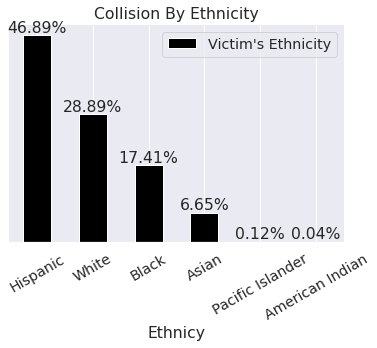

In [ ]:
# Plot bar with DataFrame
fig1 = pct_race_tc.plot(kind='bar', color='black')

# Format percentages on top of each bar
rects = fig1.patches
labels=pct_race_tc.crash_population.tolist()
labels = ['{:.2f}%'.format(i) for i in labels]
for rect,label in zip(rects,labels):
      fig1.text(rect.get_x()+rect.get_width()/2,rect.get_height(),
                label,ha='center',va='bottom')

fig1.set_title('Collision By Ethnicity')  # Display graph title      
fig1.set_xlabel('Ethnicy')                # Display graph x axis label 
fig1.set_yticks([])                       # Remove graph y ticks labels
fig1.spines['right'].set_visible(False)   # Remove right edge line
fig1.spines['top'].set_visible(False)     # Remove top edge line
fig1.spines['left'].set_visible(False)    # Remove left edge line
fig1.legend(["Victim's Ethnicity"])       # Rename legend
fig1.tick_params(axis='x', rotation=30)   # Set parameres for x axis

By looking at the above graph, we can determine the following values, 

Hispanic: 46.89%
White (non-hispanic): 28.89%
Black: 17.41%
Asian: 6.65%
Pacific Islander: 0.12%
American Indian: 0.04%

We are going to create dictionary of LA Ethnicity Population. We will be adding a new column to display LA Ethnicity Populaton and formart crash population column.



In [ ]:
# Create dictionary of LA Ethnicity Population  
ethn_dict = {"Hispanic":"48.2", 
             "White":"28.5", 
             "Black":"9.0", 
             "Asian":"11.6", 
             "Pacific Islander":"0.2", 
             "American Indian":"0.4"}

# Add a new column to display LA Ethnicity Populaton and formart crash population column
pct_race_tc["LA_Population"] = pd.Series(ethn_dict)
multibar = pct_race_tc.style.format({"crash_population":"{:.2f}"})
multibar

,crash_population,LA_Population
Hispanic,46.89,48.2
White,28.89,28.5
Black,17.41,9.0
Asian,6.65,11.6
Pacific Islander,0.12,0.2
American Indian,0.04,0.4


We are going to set the required data parameters. We are going to create dataFrame and add Los Angeles population list to it. We are going to rename columns to display Crash Population and LA Population. We are going to generate the Plot. We will be displaying graph title. 

 




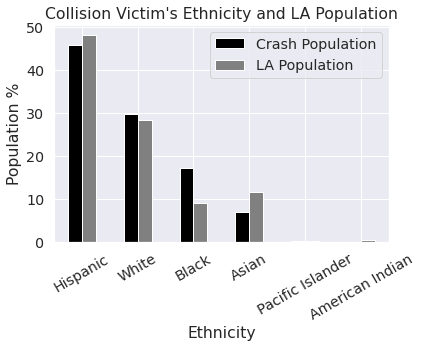

In [ ]:
# Set required data parameres 
xaxis = ["Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"] 
crash = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)

# Create DataFrame and add la_pop list to it
crash_tc = pd.DataFrame(crash,xaxis)
crash_tc[1] = la_pop

# Rename colums to display Crash Population and LA Population 
crash_tc = crash_tc.rename(columns = 
                           {0:'Crash Population',1:'LA Population'})

# Generate the Plot 
fig2 = crash_tc.plot(kind='bar', color=["black", "gray"], use_index=True)


# Display graph title
fig2.set_title("Collision Victim's Ethnicity and LA Population")
fig2.set_xlabel("Ethnicity")            # Give graph x axis label
fig2.set_ylabel ("Population %")        # Give graph y axis label
fig2.legend(loc="best")                 # Display legend in best location
fig2.tick_params(axis='x', rotation=30) # Set parameres for x axis

The above graph shows both the LA population and crash population of all the ethnicities in Los Angeles. We can see that LA population mostly consists of Hispanic ethnicity and Hispanics are the highest number of people that are involved in accidents. Whereas, despite black population, the amount of black ethnic people involved in accidents is higher when compared to the Black ethnic population. 

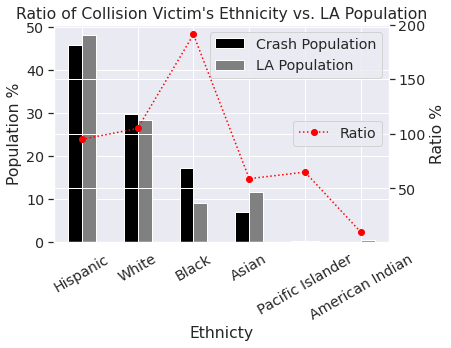

In [ ]:
# Set parameters for the ratio of crash victims vs LA population 
ratio = [95, 105, 191, 59, 65, 10]

# Generate the Plot with ratio line
fig3 = crash_tc.plot(kind='bar', color=["black", "gray"], use_index=True)
line_data = fig3.twinx()
line_fig = line_data.plot(ratio, linestyle=':',marker='o',color='red', label='Ratio')

# Display graph title
plta.title("Ratio of Collision Victim's Ethnicity vs. LA Population")
plta.ylabel("Ratio %")                   # Give graph right y axis label
plta.legend(loc="right")                 # Display "Ratio" legend to the right
fig3.set_xlabel("Ethnicty")              # Give graph x axis label
fig3.set_ylabel ("Population %")         # Give graph left y axis label
fig3.legend(loc="best")                  # Display legend in best location
fig3.tick_params(axis='x', rotation=30)  # Set parameres for x axis


When we look at the above graph which has the comparison between crash population and LA population, we can see that Black ethnic people have the highest ratio of Crash population to LA population. Whereas American Indians have the lowest ratio of crash population to LA population. 

Victim Collisions by Gender



---

We are going to calculate the total population on the basis of gender. 

In [ ]:
# Create DataFrame with the total counts of each gender
sex_race_counts = pd.DataFrame(tc['victim_sex'].value_counts())

# Only display Male and Female, omit unknown
sex_race_counts = sex_race_counts.loc[["Male", "Female"]] 
sex_race_counts

,victim_sex
Male,284740
Female,194990


We are going to calculate the crash population percentage and LA population percentage based on the gender.

In [ ]:
# Calculate the percentage of victim's gender
sex_pct = sex_race_counts/sex_race_counts.sum()*100

# Create dictionary of LA Gender Population
gender_pop = {"Male": "49.2531",
              "Female": "50.7468"}

# Add a new column to display LA Gender Populaton 
sex_pct["pop_pct"] = pd.Series(gender_pop)
sex_pct

,victim_sex,pop_pct
Male,59.35422,49.2531
Female,40.64578,50.7468


**Comparison of victims by gender**


---

From the above data, we can compare the Crash population and LA population of both Male and female. 




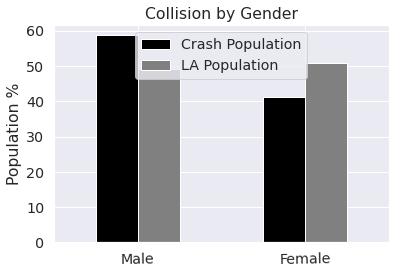

In [ ]:
# Set the parameters 
ratio = [118.86, 81.22]
xaxis = ['Male', 'Female'] 
crash = (58.69, 41.31)
la_pop = (49.25, 50.75)

# Create DataFrame and add la_pop list to it
gender_tc = pd.DataFrame(crash,xaxis)
gender_tc[1] = la_pop 

# Rename colums to display Crash Population and LA Population 
gender_tc = gender_tc.rename(columns = {0:'Crash Population',1:'LA Population'})

# Generate the Plot 
fig4 = gender_tc.plot(kind='bar', color=["black", "gray"], use_index=True)
        
fig4.set_title("Collision by Gender")  # Display graph title
fig4.set_ylabel("Population %")        # Give graph y axis label
fig4.legend(loc="upper center")        # Display legend in upper center
fig4.tick_params(axis='x', rotation=1) # Set parameres for x axis

from the above graph we are plotting collision by gender. Male population is more when compared with female. but the crash population for men is more than their population this means that every person is affected ny accident more than once. 

Below are the LA Age Categories;

Children: less than 18 years old
College: from 18 to 21 years old
Younger Adult: from 22 to 39 years old
Older Adult: from 40 to 64 years old
Senior: more than 64 years old

In [ ]:
#create bins to extract age range
bins = [0,19,22,40,65, float("inf")]
age = ["Children ( < 18 years old )",
       "College ( 18 to 21 years old )",
       "Younger Adult ( 22 to 39 years old )",
       "Older Adult ( 40 to 64 years old )",
       "Senior ( > 64 years old )"]

tc['Age Category'] = pd.cut(tc['victim_age'],bins, right=False, labels=age)

age_group = tc.groupby("Age Category")
print(age_group["victim_race", "victim_age"].mean())

age_count["age_count"] = age_group[["victim_age"]].count()
age_count["age_mean"] = age_group["victim_age"].mean()
age_tc = age_count[["age_count","age_mean"]]
age_tc

                                      victim_age
Age Category                                    
Children ( < 18 years old )            17.198664
College ( 18 to 21 years old )         20.281713
Younger Adult ( 22 to 39 years old )   29.949467
Older Adult ( 40 to 64 years old )     50.210275
Senior ( > 64 years old )              76.839326


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


,age_count,age_mean
Age Category,,
Children ( < 18 years old ),4042,17.198664
College ( 18 to 21 years old ),25494,20.281713
Younger Adult ( 22 to 39 years old ),221815,29.949467
Older Adult ( 40 to 64 years old ),192248,50.210275
Senior ( > 64 years old ),40355,76.839326


Text(0.5, 1.0, 'Age of Traffic Accident Victims in Los Angeles')

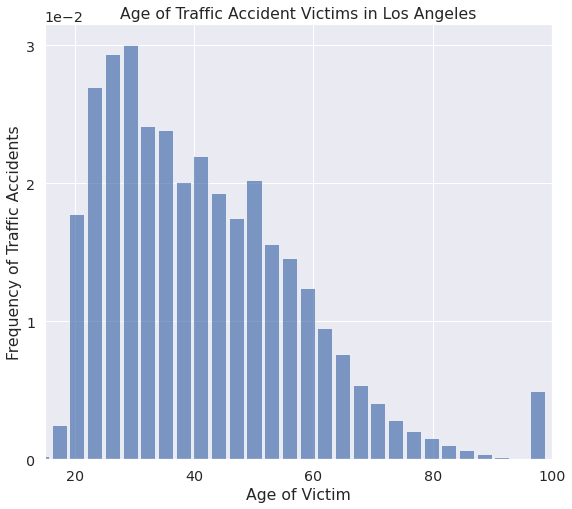

In [ ]:
import matplotlib.pyplot as plt

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
sns.set(font_scale=1.3)

#---Lets make two graphs to display this data---#
fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('10-Year Accident Total and Hourly Distribution of the \n 5 Most Dangerous Intersections In Los Angeles')
fig.set_figheight(8)
fig.set_figwidth(20)

#---What are the ages of victims of traffic accident in LA?---#
plt.subplot(122)
ax2 = plt.hist(tc.victim_age, bins=30, color='b', alpha=0.7, rwidth=0.85, density=True)
#ax2 = plt.subplot()
plt.yticks([0, 0.01, 0.02, 0.03])
plt.xticks([0, 20, 40, 60, 80, 100])
plt.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
plt.xlim(15, 100)
plt.xlabel(f'Age of Victim')
plt.ylabel('Frequency of Traffic Accidents')
plt.title(f'Age of Traffic Accident Victims in Los Angeles')

In [ ]:
# Average Victim Race per Ethnicity
tc1 = tc.copy()                                   # Copy original DataFrame
tc1 = tc1[['victim_race','victim_age']]           # Display only Victim Race and Victim Age
tc1=tc1.groupby(['victim_race'])                  # Group by Victim Race
meandata = pd.DataFrame(tc1['victim_age'].mean()) # Create DataFrame with average Victim Age per Ethnicity
meandata = meandata[meandata.index!='Unknown']    # Omit Unknown from DataFrame
meandata                                         # Display DataFrame

,victim_age
victim_race,
American Indian,39.473373
Asian,43.201978
Black,42.210361
Hispanic,38.490663
Pacific Islander,43.085149
White,43.502255


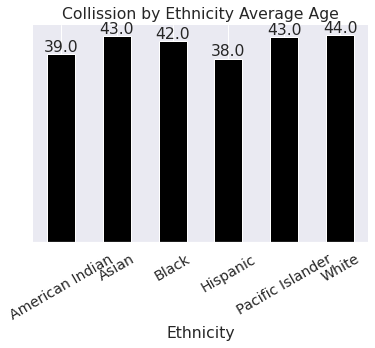

In [ ]:
# Plot Average Victim Age per Ethnicity
fig5 = meandata.plot(kind='bar', color="black")

# Format percentages on top of each bar
rects = fig5.patches
labels=meandata.victim_age.tolist()
labels=[round(i,0) for i in labels]
sum_labels = sum(labels)
for rect,label in zip(rects,labels):
      fig5.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va='bottom')

fig5.set_title("Collission by Ethnicity Average Age") # Display graph title  
fig5.set_xlabel("Ethnicity")                          # Display graph x axis label 
fig5.set_yticks([])                                   # Remove graph y ticks labels
fig5.legend().remove()                                # Remove legend
fig5.spines['right'].set_visible(False)               # Remove right edge line
fig5.spines['top'].set_visible(False)                 # Remove top edge line
fig5.spines['left'].set_visible(False)                # Remove left edge line
fig5.tick_params(axis='x', rotation=30)               # Set parameres for x axis

In [ ]:
# Remove Unknown from Victim Race
race_data = updated_victim_race[updated_victim_race.index!='Unknown']
race_data

,victim_race,crash_population
Hispanic,191765,46.886423
White,118167,28.891758
Black,71187,17.405177
Asian,27206,6.651850
Pacific Islander,505,0.123472
American Indian,169,0.041320


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


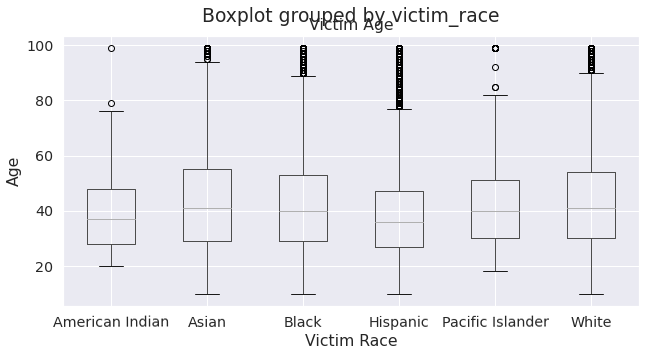

In [ ]:
# Boxplot by Victim Age and Race
tc1 = tc.copy()                          # Copy original DataFrame
tc1 = tc1[['victim_race','victim_age']]  # Display only Victim Race and Victim Age
tc1 = tc1[tc1['victim_race']!='Unknown'] # Omit Unknown from DataFrame

# Plot BoxPlot with Victim Age and Race
fig6 = tc1.boxplot('victim_age',by='victim_race', figsize=(10, 5))

fig6.set_title("Victim Age")              # Display graph title 
fig6.set_xlabel("Victim Race")            # Display graph x axis label
fig6.set_ylabel("Age")                    # Display graph y axis label
fig6.tick_params(axis='x', rotation=.25)   # Set parameres for x axis

In [ ]:
# Extract individual groups
Hispanic = tc1[tc1["victim_race"] == "Hispanic"]["victim_age"]
White =  tc1[tc1["victim_race"] == "White"]["victim_age"]
Black = tc1[tc1["victim_race"] == "Black"]["victim_age"]
Asian = tc1[tc1["victim_race"] == "Asian"]["victim_age"]
PacificIsl = tc1[tc1["victim_race"] == "Pacific Islander"]["victim_age"]
AmericanInd = tc1[tc1["victim_race"] == "American Indian"]["victim_age"]

In [ ]:
# Perform the ANOVA
stats.f_oneway(Hispanic, White, Black, Asian, PacificIsl, AmericanInd)

F_onewayResult(statistic=1867.1071178328334, pvalue=0.0)

In [ ]:
pip install gmaps

In [ ]:
import os
import matplotlib.pyplot as plta
import pandas as pd
import numpy as np
import requests
import datetime
import ast
import gmaps
import datetime
from pandas.api.types import CategoricalDtype

file_path = "sample_data/drive/MyDrive/trafficcollision.csv"
df = pd.read_csv(file_path)
df.head()



,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [ ]:
#create bins to extract hour from 'time'
bins = []
hour = []
for i in range (0,25):
    bins.append(99*i+i-1)
    hour.append(i)
hour.pop(-1)
tc['hour'] = pd.cut(tc['time'],bins,labels=hour)
tc.hour.dropna()
tc['date']=pd.to_datetime(tc['date'])
tc['month']=tc['date'].dt.month
tc['weekday'] = tc['date'].dt.dayofweek
weekday_description = {0:'Sunday', 1:'Monday', 2:'Tuesday',3:'Wednesday', 4:'Thursday', 5:'Friday',
                        6:'Saturday'}
tc.weekday=tc.weekday.map(weekday_description)

In [ ]:
tc.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location,Age Category,hour,month,weekday
0,2019-08-24,450,Southwest,356,22.0,Male,Hispanic,STREET,JEFFERSON BL,"(34.0255, -118.3002)",Younger Adult ( 22 to 39 years old ),4,8,Friday
1,2019-08-30,2320,Southwest,355,30.0,Female,Hispanic,STREET,JEFFERSON BL,"(34.0256, -118.3089)",Younger Adult ( 22 to 39 years old ),23,8,Thursday
2,2019-11-20,350,Central,128,21.0,Male,Hispanic,STREET,1ST,"(34.0492, -118.2391)",College ( 18 to 21 years old ),3,11,Tuesday
3,2019-08-30,2100,Southwest,374,49.0,Male,Black,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)",Older Adult ( 40 to 64 years old ),21,8,Thursday
4,2019-07-06,950,Hollenbeck,423,60.0,Male,Hispanic,STREET,MAIN,"(34.066, -118.2102)",Older Adult ( 40 to 64 years old ),9,7,Friday


# **How Many Car Accidents Per Month?**

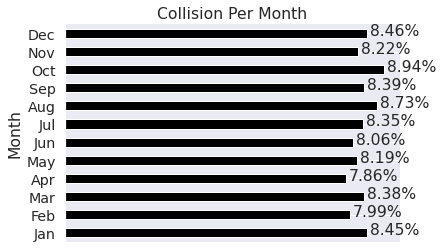

In [ ]:
tc1= tc.copy()
# #map the month column to make it look neat
month_description = ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
# df1.month = df.month.map(month_description)


month_data = pd.DataFrame(tc1.month.value_counts())
month_data= month_data.sort_index()
fig_month = month_data.plot(kind='barh',color='black')


fig_month.set_ylabel('Month')
fig_month.set_yticklabels(month_description)
fig_month.set_xticks([])
fig_month.set_title('Collision Per Month')
fig_month.spines['right'].set_visible(False)
fig_month.spines['top'].set_visible(False)
fig_month.spines['bottom'].set_visible(False)
fig_month.tick_params(axis='x', rotation=40)
fig_month.get_legend().remove()


rects=fig_month.patches
labels = tc1['month'].value_counts().sort_index()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
      fig_month.text(rect.get_width()*1.01,rect.get_y(),label,ha='left',va=
              'bottom')

## **How Many Car Accidents Per Weekday?**

In [ ]:
tc1 = tc.copy()
tc1.hour.dropna()
tc1 = tc1[['weekday','hour','location']]
tc1 = tc1.groupby(['weekday','hour'])
tc1 = tc1.count()
tc1.reset_index(level=1,inplace=True)
tc1.reset_index(level=0,inplace=True)
tc1=tc1.rename(columns={'location':'count'})
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tc1['weekday'] = pd.Categorical(tc1['weekday'], categories=cats, ordered=True)
tc1 = tc1.sort_values(by=['weekday','hour'])
tc1.head(24)

,weekday,hour,count
24,Monday,0,1090
25,Monday,1,843
26,Monday,2,692
27,Monday,3,444
28,Monday,4,410
29,Monday,5,801
30,Monday,6,1633
31,Monday,7,3846
32,Monday,8,4284
33,Monday,9,3602


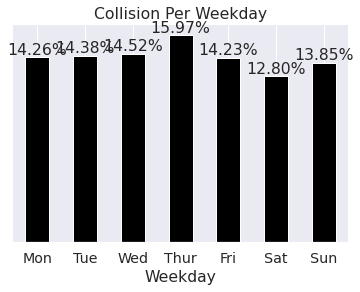

In [ ]:
tc2 = tc1.copy()
tc2
tc3 = tc2.groupby('weekday').agg({'count':np.sum})
fig = tc3.plot(kind='bar',color='black')
fig.set_yticks([])
fig.set_xlabel('Weekday')
fig.set_xticklabels(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'],rotation = 0)
fig.set_title('Collision Per Weekday')

rects = fig.patches
labels=tc3['count'].tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
      fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va=
              'bottom')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.get_legend().remove()


## **How Many Car Accidents Per Hour?**

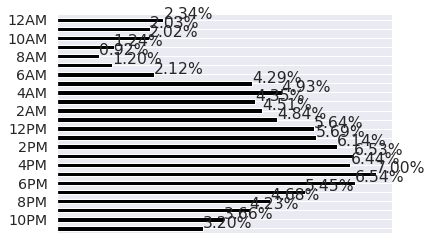

In [ ]:
tc2 = tc1.copy()
tc4 = tc2.groupby('hour').agg({'count':np.sum})
tc4 = tc4.sort_index(ascending = False)
hour_description={0:'12AM',1:'1AM', 2:'2AM', 3:'3AM',4:'4AM', 5:'5AM', 6:'6AM',
                        7:'7AM', 8:'8AM', 9:'9AM',10:'10AM', 11:'11AM', 12:'12PM',
                  13:'1PM', 14:'2PM', 15:'3PM',16:'4PM', 17:'5PM', 18:'6PM',
                        19:'7PM', 20:'8PM', 21:'9PM',22:'10PM', 23:'11PM'}
tc4.index = tc4.index.map(hour_description)
fig = tc4.plot(kind='barh',color='black')
fig.set_xticks([])
fig.set_yticklabels([' ','10PM', '', '8PM',' ', '6PM',' ',
                        '4PM', ' ', '2PM',' ', '12PM', ' ',
                  '2AM', ' ', '4AM',' ', '6AM', ' ',
                        '8AM',' ','10AM',' ','12AM'])
# fig.set_yticklabels([' ',' ', '', ' ',' ', ' ',' ',
#                          ' ', ' ', ' ',' ', ' ', ' ',
#                    ' ', ' ', ' ',' ', ' ', ' ',
#                          '2PM','4PM','6PM','3PM','5PM'])
fig.set_xlabel('')
fig.set_ylabel('')



rects = fig.patches
labels=tc4['count'].tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
    fig.text(rect.get_width(),rect.get_y(),label,ha='left',va=
               'bottom')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.get_legend().remove()

Text(0.5, 1.0, 'Occurance of Daily Traffic Accidents in Los Angeles')

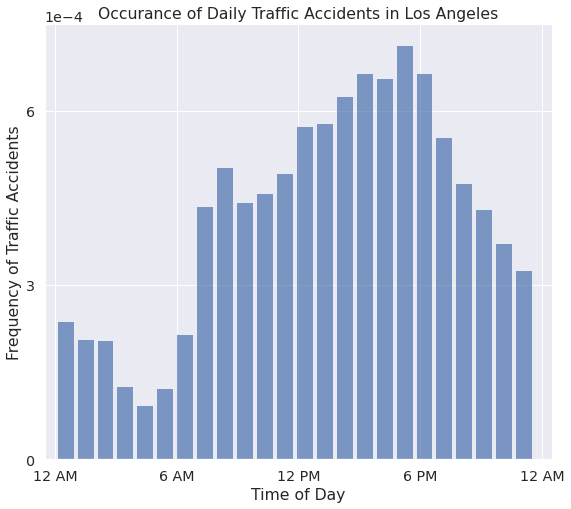

In [ ]:
#---Lets start by asking the obvious questions---#
#---1: What times do accidents in LA occur?---#
#---2: Who is most affected by traffic accidents?---#

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
sns.set(font_scale=1.3)

#---Lets make two graphs to display this data---#
fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('10-Year Accident Total and Hourly Distribution of the \n 5 Most Dangerous Intersections In Los Angeles')
fig.set_figheight(8)
fig.set_figwidth(20)

#------What times do accidents in LA occur?------#
plt.subplot(121)
ax1 = plt.hist(tc.time, bins=24, color='b', alpha=0.7, rwidth=0.85, density=True)
plt.yticks([0, 0.0003, 0.0006])
plt.xticks([0, 600, 1200, 1800, 2400],['12 AM', '6 AM', '12 PM', '6 PM', '12 AM'])
#ax1.set_xticklabels(['12:00 AM', '6:00 AM', '12:00 PM', '6:00 PM', '12:00 AM'])
plt.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
plt.xlim(-50, 2450)
plt.xlabel(f'Time of Day')
plt.ylabel('Frequency of Traffic Accidents')
plt.title(f'Occurance of Daily Traffic Accidents in Los Angeles')


# **Collision Heatmap** 

**Collison Heatmap**


---

We will plot a heatmap representing the total number of accidents that occured during different times of the day on every day of the week. 



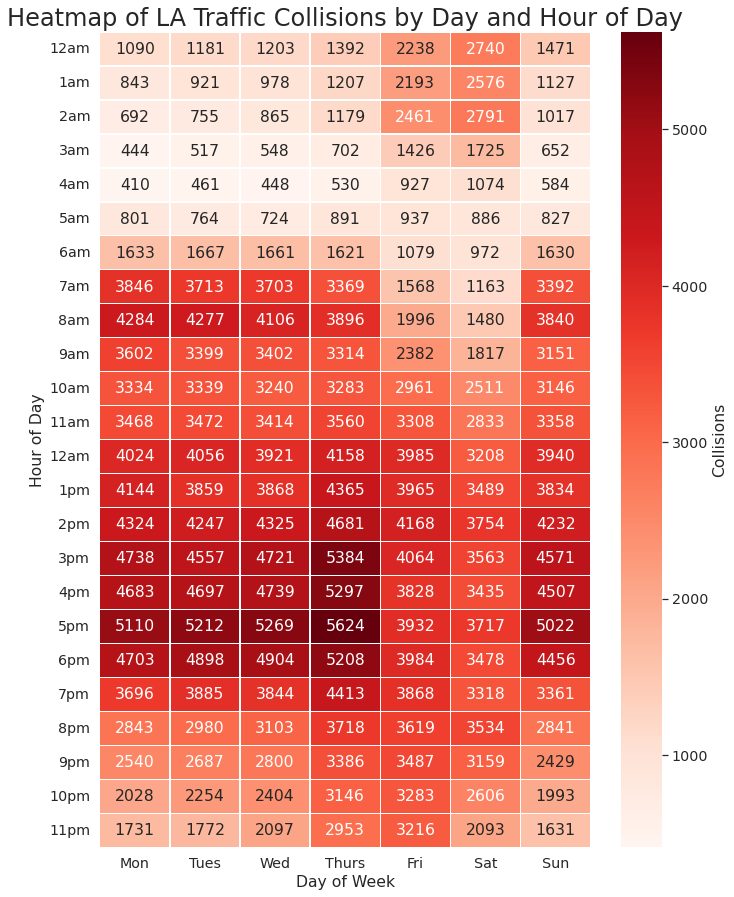

In [ ]:
import seaborn as sns
data = pd.pivot_table(tc1, values = 'count',index=['weekday','hour'])
data = data.unstack(level = 0)
data
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
detailed_hours = ['12am', '1am', '2am', '3am', '4am', '5am', '6am','7am','8am','9am',
                 '10am','11am','12am','1pm', '2pm', '3pm', '4pm', '5pm', '6pm','7pm','8pm','9pm',
                 '10pm','11pm']
#plot the heatmap
fig,ax = plta.subplots(figsize=(11,15))
ax = sns.heatmap(data, annot=True, fmt="d", linewidths=.5,cmap="Reds",
                 ax=ax,xticklabels=day_short_names,yticklabels=detailed_hours,
                cbar_kws={'label':'Collisions'})

#set labels
ax.axes.set_title("Heatmap of LA Traffic Collisions by Day and Hour of Day", fontsize=24, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour of Day');


# **Collision Heatmap in percentage**



---

The below collision heatmap consists of data from the above heatmap whereas instead the results are represented in the form of percentage



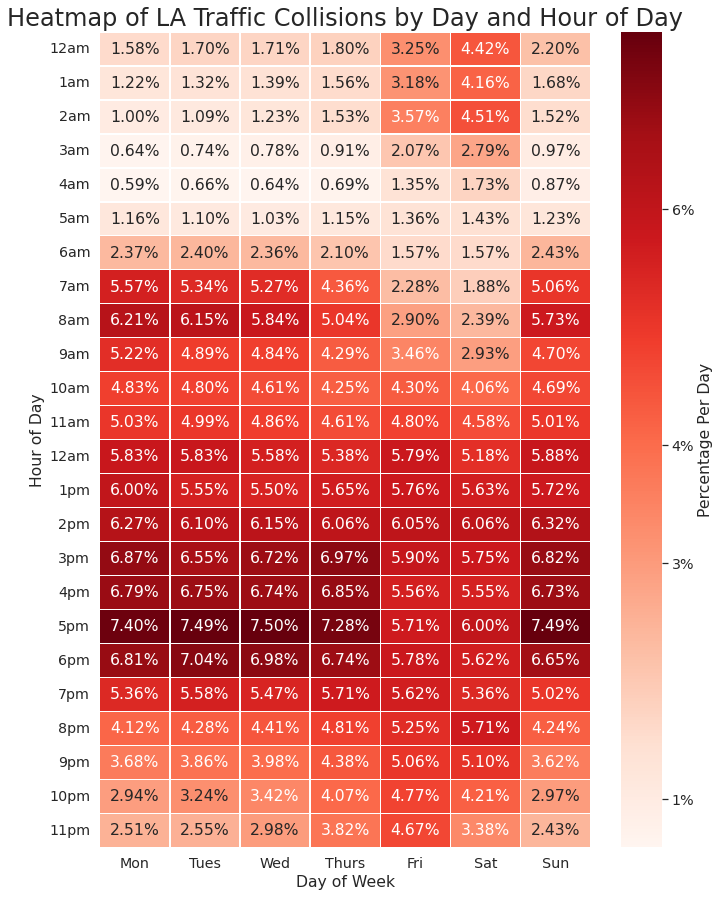

In [ ]:
data1 = data.copy()
data1['count'] = round((data1['count']/data['count'].sum()),4)
fig,ax = plta.subplots(figsize=(11,15))
ax = sns.heatmap(data1, annot=True, fmt=".2%", linewidths=.5,cmap="Reds",
                 ax=ax,xticklabels=day_short_names,yticklabels=detailed_hours,
                cbar_kws={'label':'Percentage Per Day'})

#set labels
ax.axes.set_title("Heatmap of LA Traffic Collisions by Day and Hour of Day", fontsize=24, y=1.01
                 )
ax.set(xlabel='Day of Week', ylabel='Hour of Day');
cbar=ax.collections[0].colorbar
cbar.set_ticks([.01,.03,.04,.06])
cbar.set_ticklabels(['1%','3%','4%','6%'])

In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
!jupyter nbextension enable --py --sys-prefix gmaps


Enabling notebook extension jupyter-gmaps/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
%matplotlib inline


In [ ]:
!pip install gmaps


In [ ]:
pip install config

In [ ]:
# Import modules for the analysis environment
import gmaps
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import config

In [ ]:
# Create a data frame counting the number of crashes per location coordinates
test_tc = pd.DataFrame(tc["location"].value_counts())
test2_tc = test_tc.reset_index(level=0)
test2_tc.head()

,index,location
0,"(0.0, 0.0)",663
1,"(33.9892, -118.3089)",529
2,"(34.2012, -118.4662)",478
3,"(34.2216, -118.4488)",465
4,"(33.9601, -118.2827)",458


In [ ]:
# Delete "(0,0) coordinate value at row 13"
test3_tc = test2_tc[test2_tc.index != 13]
test3_tc.head(5)

,index,location
0,"(0.0, 0.0)",663
1,"(33.9892, -118.3089)",529
2,"(34.2012, -118.4662)",478
3,"(34.2216, -118.4488)",465
4,"(33.9601, -118.2827)",458


We have the location coordinates in the form of a string. We are trying to convert them into a tuple so that we can make use of those tuples in the future. 

In [ ]:
# Convert the location coordinates from a string into a tuple, 
# so it can be run into the google map api
locations = test3_tc["index"]
locations = locations.tolist()
locations_list = [literal_eval(tup) for tup in locations]
locations_list

[(0.0, 0.0),
 (33.9892, -118.3089),
 (34.2012, -118.4662),
 (34.2216, -118.4488),
 (33.9601, -118.2827),
 (34.2012, -118.4313),
 (34.2355, -118.5536),
 (34.1867, -118.4662),
 (34.1721, -118.4662),
 (34.1016, -118.3387),
 (34.0183, -118.3556),
 (34.2012, -118.4487),
 (33.96, -118.309),
 (34.2355, -118.4676),
 (34.0691, -118.2917),
 (34.1938, -118.5884),
 (34.0908, -118.3092),
 (34.1939, -118.4487),
 (33.96, -118.3003),
 (34.2573, -118.5361),
 (34.1939, -118.536),
 (33.9601, -118.2782),
 (34.0216, -118.3556),
 (34.2214, -118.4677),
 (33.9747, -118.2827),
 (33.9892, -118.2915),
 (34.2012, -118.4052),
 (33.989, -118.3308),
 (33.9892, -118.2827),
 (34.1685, -118.6058),
 (33.9746, -118.309),
 (34.2355, -118.5361),
 (34.2575, -118.5023),
 (33.9747, -118.2783),
 (34.0109, -118.2915),
 (34.0716, -118.3614),
 (34.0473, -118.2916),
 (33.9746, -118.3003),
 (34.1866, -118.5535),
 (34.1939, -118.4662),
 (34.0436, -118.309),
 (34.0689, -118.344),
 (34.098, -118.3441),
 (34.2012, -118.5011),
 (34.0109

Below, we are trying to seperate latitude and longitude from the location column. We can use the latitude and longitude to identify the exact location of the occurence of the accident. 

In [ ]:
# Seperate Latitude and Longitude into two seperate columns into a data frame
lat_long_tc = pd.DataFrame(locations_list, columns = ["Lat", "Long"])
lat_long_tc.head()

,Lat,Long
0,0.0000,0.0000
1,33.9892,-118.3089
2,34.2012,-118.4662
3,34.2216,-118.4488
4,33.9601,-118.2827


After we obtain the latitude and longitude values, we try to calculate the crash counts for each latitude and longitude. Thus, we get a total number of accidents for every specific location. 

In [ ]:
# Add the crash counts to the new data frame
lat_long_tc["Crash Counts"] = pd.Series(test3_tc["location"])
print(lat_long_tc)
# del tc['lat']
# del tc['long']

           Lat      Long  Crash Counts
0       0.0000    0.0000         663.0
1      33.9892 -118.3089         529.0
2      34.2012 -118.4662         478.0
3      34.2216 -118.4488         465.0
4      33.9601 -118.2827         458.0
...        ...       ...           ...
46470  34.0841 -118.1655           1.0
46471  34.0177 -118.1953           1.0
46472  34.0534 -118.2200           1.0
46473  34.0756 -118.4837           1.0
46474  34.0432 -118.5269           1.0

[46475 rows x 3 columns]


We assign variables to latitudes, longitudes and crash counts. 

In [ ]:
# Set variables to the locations and the resective crash counts
locations = lat_long_tc[["Lat","Long"]]
crashes = lat_long_tc["Crash Counts"].astype(float)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer for top 100 crash locations
heat_layer = gmaps.heatmap_layer(locations[0:100], weights=crashes[0:100], 
                                 dissipating=False, max_intensity=crashes.max(), 
                                 point_radius=.009)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

From the above heatmap, we can identify the areas that are most affected due to accidents. Areas that are less affected are indicated with green part and the areas with highest number of accidents are indicated with red. 

In [ ]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
crash_layer = gmaps.symbol_layer(locations[0:9], fill_color = "red", stroke_color = "red", scale = 2) 
    
# Add layer
fig.add_layer(crash_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In the above diagram, it shows different locations in Los Angeles on a map with help of red pin-points which are affected with accidents. 

In [ ]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483954 entries, 0 to 483953
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          483954 non-null  datetime64[ns]
 1   time          483954 non-null  int64         
 2   area          483954 non-null  object        
 3   district      483954 non-null  int64         
 4   victim_age    483954 non-null  float64       
 5   victim_sex    483954 non-null  object        
 6   victim_race   483954 non-null  object        
 7   premise       483954 non-null  object        
 8   address       483954 non-null  object        
 9   location      483954 non-null  object        
 10  Age Category  483954 non-null  category      
 11  hour          483954 non-null  category      
 12  month         483954 non-null  int64         
 13  weekday       483954 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(7)
m

Below, we are trying to extracting year, month and day from the date column. In the dataset, we have the date in the format yyyy-mm-dd. We will be seperating year, month and day from the date so that we can determine the exact year, month and day of occurence of each accident. 

In [ ]:
# Extract year, month, day, hour and weekday
tc['Year']=tc['date'].dt.year
tc['Month']=tc['date'].dt.strftime('%b')
tc['Day']=tc['date'].dt.day
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483954 entries, 0 to 483953
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          483954 non-null  datetime64[ns]
 1   time          483954 non-null  int64         
 2   area          483954 non-null  object        
 3   district      483954 non-null  int64         
 4   victim_age    483954 non-null  float64       
 5   victim_sex    483954 non-null  object        
 6   victim_race   483954 non-null  object        
 7   premise       483954 non-null  object        
 8   address       483954 non-null  object        
 9   location      483954 non-null  object        
 10  Age Category  483954 non-null  category      
 11  hour          483954 non-null  category      
 12  month         483954 non-null  int64         
 13  weekday       483954 non-null  object        
 14  Year          483954 non-null  int64         
 15  Month         483

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from datetime import date

In [ ]:
# #---First lets add an index column that labels the rows---#
tc.insert(0, 'index', np.arange(len(tc)))
tc['index'] = np.arange(len(tc))

tc.insert(14, 'intersection', "")
tc['intersection'] = tc['address'] + ", " + tc['area']

tc

,index,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location,Age Category,hour,month,intersection,weekday,Year,Month,Day
0,0,2019-08-24,450,Southwest,356,22.0,Male,Hispanic,STREET,JEFFERSON BL,"(34.0255, -118.3002)",Younger Adult ( 22 to 39 years old ),4,8,"JEFFERSON BL, Southwest",Friday,2019,Aug,24
1,1,2019-08-30,2320,Southwest,355,30.0,Female,Hispanic,STREET,JEFFERSON BL,"(34.0256, -118.3089)",Younger Adult ( 22 to 39 years old ),23,8,"JEFFERSON BL, Southwest",Thursday,2019,Aug,30
2,2,2019-11-20,350,Central,128,21.0,Male,Hispanic,STREET,1ST,"(34.0492, -118.2391)",College ( 18 to 21 years old ),3,11,"1ST, Central",Tuesday,2019,Nov,20
3,3,2019-08-30,2100,Southwest,374,49.0,Male,Black,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)",Older Adult ( 40 to 64 years old ),21,8,"MARTIN LUTHER KING JR, Southwest",Thursday,2019,Aug,30
4,4,2019-07-06,950,Hollenbeck,423,60.0,Male,Hispanic,STREET,MAIN,"(34.066, -118.2102)",Older Adult ( 40 to 64 years old ),9,7,"MAIN, Hollenbeck",Friday,2019,Jul,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483949,483949,2022-02-09,1730,77th Street,1257,46.0,Male,Hispanic,STREET,77TH ST,"(33.9698, -118.2827)",Older Adult ( 40 to 64 years old ),17,2,"77TH ST, 77th Street",Tuesday,2022,Feb,9
483950,483950,2022-02-16,1207,77th Street,1248,99.0,Male,White,STREET,HOOVER ST,"(33.9822, -118.2871)",Senior ( > 64 years old ),12,2,"HOOVER ST, 77th Street",Tuesday,2022,Feb,16
483951,483951,2022-02-16,1830,77th Street,1257,45.0,Male,Unknown,STREET,SAN PEDRO,"(33.9693, -118.285)",Older Adult ( 40 to 64 years old ),18,2,"SAN PEDRO, 77th Street",Tuesday,2022,Feb,16
483952,483952,2022-02-13,1450,Mission,1924,99.0,Male,Hispanic,STREET,LAUREL CANYON BL,"(34.2889, -118.4637)",Senior ( > 64 years old ),14,2,"LAUREL CANYON BL, Mission",Saturday,2022,Feb,13


**Most Dangerous Intersection**


---

Now, as we have a clean dataset and and all the statistics, let's try to predict whic intersection in Los Angeles had the highest number of accidents.


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


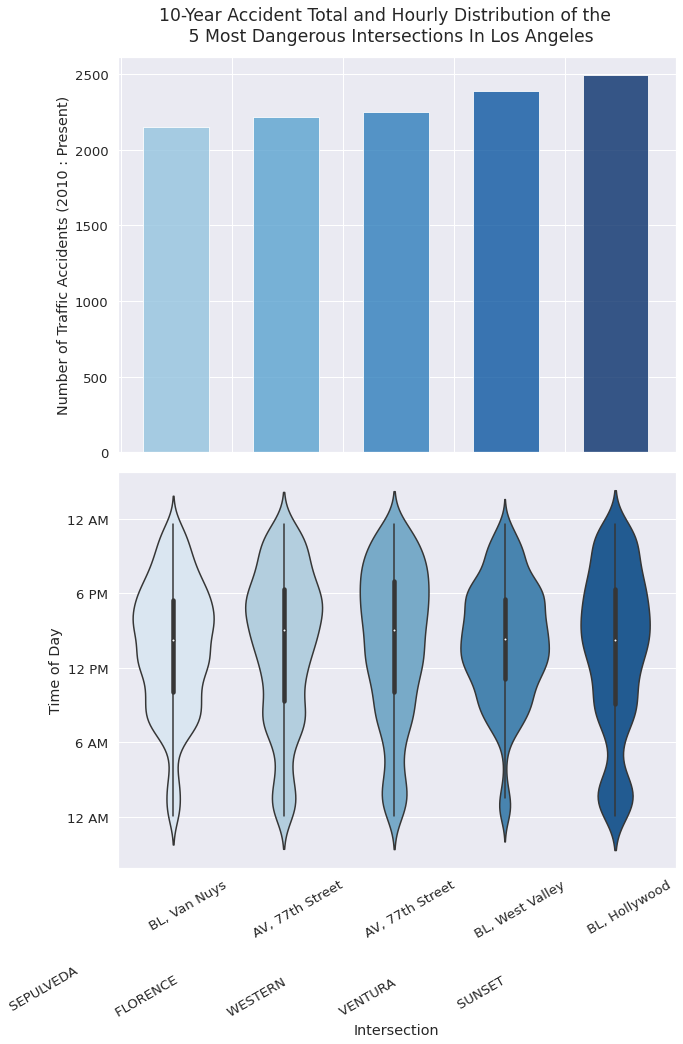

In [ ]:
tc_intersection_df = tc['intersection'].reset_index()
tc_intersection_df_gr = tc.groupby('intersection').count().sort_values(by=['index'], ascending=False).reset_index().rename(columns={'index':'count'})

#---Lets grab only the top 5 most dangerous intersections---#
top_five_intersection = tc_intersection_df_gr.iloc[:5]
top_five_intersection.sort_values(by=['count'], inplace=True)

#---The most dangerous intersection is 21 miles from downtown LA!---#

#---What times do accidents occur at these intersections? Lets examine the top 5 intersections with the most accidents---#
intersection = list(top_five_intersection['intersection'])

time_intersection_df = tc[['time', 'intersection']]
time_top5_intersection_df = time_intersection_df[(time_intersection_df.intersection.isin(intersection))].reset_index()

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
palette=sns.color_palette('Blues', n_colors=5)
sns.set(font_scale=1.2)

#---Lets make two verticle graphs to display this data together---#
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('10-Year Accident Total and Hourly Distribution of the \n 5 Most Dangerous Intersections In Los Angeles')
fig.set_figheight(14)
fig.set_figwidth(10)

#---Define color scale---#
color = cm.Blues(np.linspace(0.4, 1, 5))

#---This is a bar plot to show the total number of accidents for each intersection---#
plt.subplot(211)
ax1 = plt.bar(range(len(top_five_intersection['count'])), top_five_intersection['count'], width=0.6, color=color, align='center', alpha=0.8)
plt.ylabel("Number of Traffic Accidents (2010 : Present)")
plt.xticks(np.arange(-0.5, 5.5, 1.01), [], rotation=30)

#---This is a violin plot showing the distribution of the times of accidents for each intersection---#
plt.subplot(212)
ax2 = sns.violinplot(data=time_top5_intersection_df, x='intersection', y='time', order=intersection, palette=palette)
ax2.set_yticks([0, 600, 1200, 1800, 2400])
ax2.set_yticklabels(['12 AM', '6 AM', '12 PM', '6 PM', '12 AM'])
ax2.set_xlabel('Intersection')
ax2.set_ylabel('Time of Day')
plt.xticks(np.arange(-0.5, 5.5, 1.01), rotation=30)

plt.subplots_adjust(top=0.93, hspace=0.05)
plt.show()


From the above diagram, we can conclude that the most affected intersection is Sunset, BL Hollywood out of the top five most affected intersections. It was affected with approximately 2500 accidents in 10 years. We can also see the occurence of accidents in topo five intersections during different times of the day. 

**Most dangerous street**


---

As we had predicted the most dangerous intersection in the above section, we are going to go ahead and determine the most dangerous street where the most number of accidents had taken place. 



/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


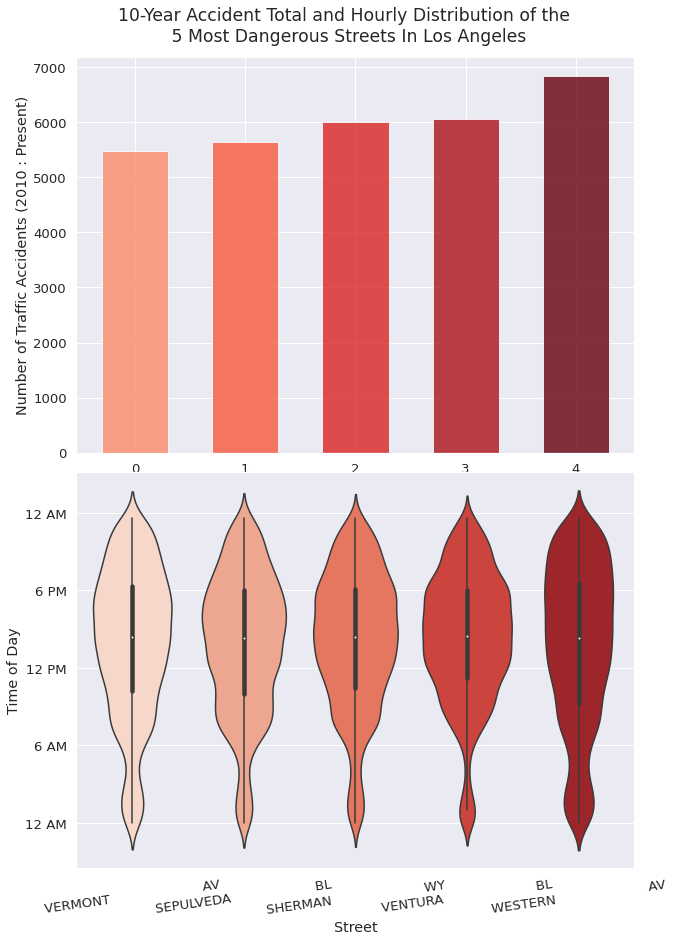

In [ ]:
#---Which street is the most dangerous?---#
collision_add_df = tc[['address']].reset_index()
collision_add_df_gr = collision_add_df.groupby('address').count().sort_values(by=['index'], ascending=False).reset_index().rename(columns={'index':'count'})

#---Lets grab the top five most dangerous streets---#
top_five_addresses = collision_add_df_gr.iloc[:5]
top_five_addresses.sort_values(by=['count'], inplace=True)

#---What times do accidents occur on these streets? Lets examine the top 5 intersections with the most accidents---#
streets = list(top_five_addresses['address'])
time_street_df = tc[['time', 'address']]
time_top5_street_df = time_street_df[(time_street_df.address.isin(streets))].reset_index()

#---Now we can plot the data---#

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
palette=sns.color_palette('Reds', n_colors=5)
sns.set(font_scale=1.2)

#---Define color scale---#
color = cm.Reds(np.linspace(0.4, 1, 5))

#---Lets make two verticle graphs to display this data together---#
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('10-Year Accident Total and Hourly Distribution of the \n 5 Most Dangerous Streets In Los Angeles')
fig.set_figheight(14)
fig.set_figwidth(10)

#---This is a bar plot to show the total number of accidents for each street---#
plt.subplot(211)
ax1 = plt.bar(range(len(top_five_addresses['count'])), top_five_addresses['count'], width=0.6, color=color, align='center', alpha=0.8)
plt.ylabel("Number of Traffic Accidents (2010 : Present)")
plt.xticks(range(len(streets)), rotation=0)

#---This is a violin plot showing the distribution of the times of accidents for each street---#
plt.subplot(212)
ax2 = sns.violinplot(data=time_top5_street_df, x='address', y='time', order=streets, palette=palette)
ax2.set_yticks([0, 600, 1200, 1800, 2400])
ax2.set_yticklabels(['12 AM', '6 AM', '12 PM', '6 PM', '12 AM'])
ax2.set_xlabel('Street')
ax2.set_ylabel('Time of Day')
plt.xticks(range(len(streets)), rotation=8)

plt.subplots_adjust(top=0.93, hspace=0.05)
plt.show()
plt.close('all')

From the above diagram, we have the first five streets that were most affected with accidents. We also have the total number of accidents that occured in those top five most affected streets during different times of the day. Thus from the above two diagrams, we can conclude that Western AV is the street that is most affected which had approximately 7000 accidents in 10 years. 

**Summary**


---
The end goal of our project is to determine who were mostly the victims of the traffic collisions in Los Angeles and which areas in Los Angeles were most affected due to accidents. Thus, we have extracted the dataset from the Los Angeles Government website. We had to explore the data and remove unwanted columns which would serve us no purpose in the analysis. We also removed the null values. We renamed all the columns for our convenience of data visualization. When we visualized the data of all the ethnicities and their statistics such as their total population and crash population, we found Los Angeles is densely populated with Hispanic ethnic people and they are the main victims of the traffic collisions. However, the population of black ethnic people being less, the ratio of Los Angeles Black ethnic total population to their crash population is the highest. The American Indians were the least affected by the traffic collisions. Accidents were also divided between victims by gender. Male victims are the highest number of affected victims in Los Angeles. All the statistics were represented in the form of graphs. We also visualized the time and day of all the accidents. We calculated the total number of accidents per month, per week, per weekday, and per hour. We found that most of the accidents took place between 12 PM – 7 PM mostly on the days Monday, Tuesday, Wednesday, and Thursday. Thursday had the highest number of accidents. Out of all the months, October was affected with the highest number of accidents. When we tried to find out the most affected intersection in Los Angeles, we can conclude that the most affected intersection is Sunset, BL Hollywood out of the top five most affected intersections. It was affected by approximately 2500 accidents in 10 years. We can also see the occurrence of accidents in the top five intersections during different times of the day. We also found out that Western AV is the street that is most affected which had approximately 7000 accidents in 10 years. 

***Please find the youtube link below.***

**Youtube Link**


---
https://youtu.be/5hDt_ZUqiiE

